# QCTO - Workplace Module

### Project Title: Please Insert your Project Title Here
#### Done By: Name and Surname

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

## 📌 Problem Statement

The avocado industry has experienced fluctuations in prices and sales volumes across regions in the United States. Stakeholders (farmers, distributors, and retailers) need insights into how factors such as sales volume, packaging type, region, and organic vs. conventional production influence the **AveragePrice** of avocados.

The primary goal of this project is to **build a regression model** to predict the **Average Avocado Price** using historical data (2015–2023). This model will provide insights into:

- How sales volumes and packaging sizes influence price
- Whether organic vs conventional type significantly affects price
- Regional differences in pricing trends
- Seasonal/temporal patterns in avocado prices

This predictive capability can help retailers optimize pricing strategies, manage supply chains, and anticipate market fluctuations.

## 🌍 Project Landscape

### Data
- Weekly avocado sales and prices from 2015–2023  
- Includes volumes, bag sizes, region, and type (conventional/organic)  

### Information
- Prices vary by region and season  
- Organic avocados tend to be priced higher  
- Extreme outliers in volume (some weeks very high, most weeks low)  

### Knowledge
- Prior studies show demand and seasonality strongly affect fresh produce prices  
- Regression models can help quantify feature importance  
- Tree-based models may capture non-linear patterns better than linear models  

### Risks
- Missing data in bag categories  
- High variability between regions  
- Outliers in sales volumes may skew the model  







---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [8]:
#Please use code cells to code in and do not forget to comment your code.

# 🥑 Avocado Prices & Sales Volume (2015–2023) — Capstone Project

## 📌 Project Goal
Build a regression model to predict **Average Avocado Prices** based on sales, packaging, region, and type of avocado.

---

## 📊 Dataset Overview

| Feature        | Description                          |
|----------------|--------------------------------------|
| **Date**       | Time series aspect (weekly data)     |
| **AveragePrice** | Target variable for regression      |
| **TotalVolume** | Total units of avocados sold        |
| **SmallBags**   | Volume in small packaging           |
| **LargeBags**   | Volume in large packaging           |
| **XLargeBags**  | Volume in extra-large packaging     |
| **Region**      | Market location across the U.S.     |
| **Type**        | Conventional vs Organic             |

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Avocado_HassAvocadoBoard_20152023v1.0.1.csv")

# Quick look at the data
print(df.head())
print(df.info())
print(df.describe())

         Date  AveragePrice  TotalVolume    plu4046    plu4225   plu4770  \
0  2015-01-04          1.22     40873.28    2819.50   28287.42     49.90   
1  2015-01-04          1.79      1373.95      57.42     153.88      0.00   
2  2015-01-04          1.00    435021.49  364302.39   23821.16     82.15   
3  2015-01-04          1.76      3846.69    1500.15     938.35      0.00   
4  2015-01-04          1.08    788025.06   53987.31  552906.04  39995.03   

   TotalBags  SmallBags  LargeBags  XLargeBags          type  \
0    9716.46    9186.93     529.53         0.0  conventional   
1    1162.65    1162.65       0.00         0.0       organic   
2   46815.79   16707.15   30108.64         0.0  conventional   
3    1408.19    1071.35     336.84         0.0       organic   
4  141136.68  137146.07    3990.61         0.0  conventional   

                region  
0               Albany  
1               Albany  
2              Atlanta  
3              Atlanta  
4  BaltimoreWashington  
<class '

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

In [ ]:
df_clean = df.copy() # = Working on a copy (`df.copy()`) to avoid accidental changes.

# Quick check to confirm it worked
print("Original shape:", df.shape)
print("Copied shape:", df_clean.shape)

Original shape: (53415, 12)
Copied shape: (53415, 12)


In [16]:
# Count missing values in each column
print(df_clean.isnull().sum())


df_clean[df_clean["SmallBags"].isnull()].head(10)



Date                0
AveragePrice        0
TotalVolume         0
plu4046             0
plu4225             0
plu4770             0
TotalBags           0
SmallBags       12390
LargeBags       12390
XLargeBags      12390
type                0
region              0
dtype: int64


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
41025,2021-12-05,1.065699,134044.83,44736.90,67915.51,698.07,20694.35,NaN,NaN,NaN,conventional,Albany
41026,2021-12-05,1.636389,2993.77,224.39,331.71,0.00,2437.68,NaN,NaN,NaN,organic,Albany
41027,2021-12-05,1.048255,682572.64,443959.42,125018.50,2508.17,111086.55,NaN,NaN,NaN,conventional,Atlanta
41028,2021-12-05,1.749787,28007.72,7286.25,10072.64,0.00,10648.82,NaN,NaN,NaN,organic,Atlanta
41029,2021-12-05,1.345853,817887.00,207339.26,223715.32,8854.06,377978.36,NaN,NaN,NaN,conventional,BaltimoreWashington
41030,2021-12-05,1.788582,45362.95,933.99,6841.41,1.15,37586.39,NaN,NaN,NaN,organic,BaltimoreWashington
41031,2021-12-05,1.011214,272998.83,174602.93,26025.22,2231.22,70139.45,NaN,NaN,NaN,conventional,BirminghamMontgomery
41032,2021-12-05,1.511550,11563.76,2963.42,743.50,0.00,7856.84,NaN,NaN,NaN,organic,BirminghamMontgomery
41033,2021-12-05,1.269260,100981.94,55998.08,10623.40,7934.13,26426.33,NaN,NaN,NaN,conventional,Boise
41034,2021-12-05,1.874634,6775.81,816.59,3204.39,0.00,2754.82,NaN,NaN,NaN,organic,Boise


In [15]:
# Total rows
total_rows = len(df_clean)

# Missing counts
missing_counts = df_clean[["SmallBags", "LargeBags", "XLargeBags"]].isnull().sum()

# Missing percentages
missing_percent = (missing_counts / total_rows) * 100

print("Total rows:", total_rows)
print("Missing values:\n", missing_counts)
print("Missing percentage:\n", missing_percent)


Total rows: 53415
Missing values:
 SmallBags     12390
LargeBags     12390
XLargeBags    12390
dtype: int64
Missing percentage:
 SmallBags     23.195732
LargeBags     23.195732
XLargeBags    23.195732
dtype: float64


##  Handling Missing Values

From our inspection, we found that **about 23% of the dataset has missing values** in the `SmallBags`, `LargeBags`, and `XLargeBags` columns.  

Dropping these rows would remove nearly a quarter of our data, which is too risky and may cause us to lose valuable insights.  

➡️ **Decision:** For now, we will fill these missing values with `0`, assuming that no sales were recorded for those bag categories in those weeks or regions.


In [20]:
print(df_clean[["SmallBags", "LargeBags", "XLargeBags"]].isnull().sum())

SmallBags     0
LargeBags     0
XLargeBags    0
dtype: int64


       AveragePrice   TotalVolume     TotalBags
count  53415.000000  5.341500e+04  5.341500e+04
mean       1.428910  8.694474e+05  2.175083e+05
std        0.393116  3.545274e+06  8.676947e+05
min        0.440000  8.456000e+01  0.000000e+00
25%        1.119091  1.626465e+04  7.846520e+03
50%        1.400000  1.203525e+05  3.695310e+04
75%        1.690000  4.542380e+05  1.110146e+05
max        3.440830  6.103446e+07  1.629830e+07


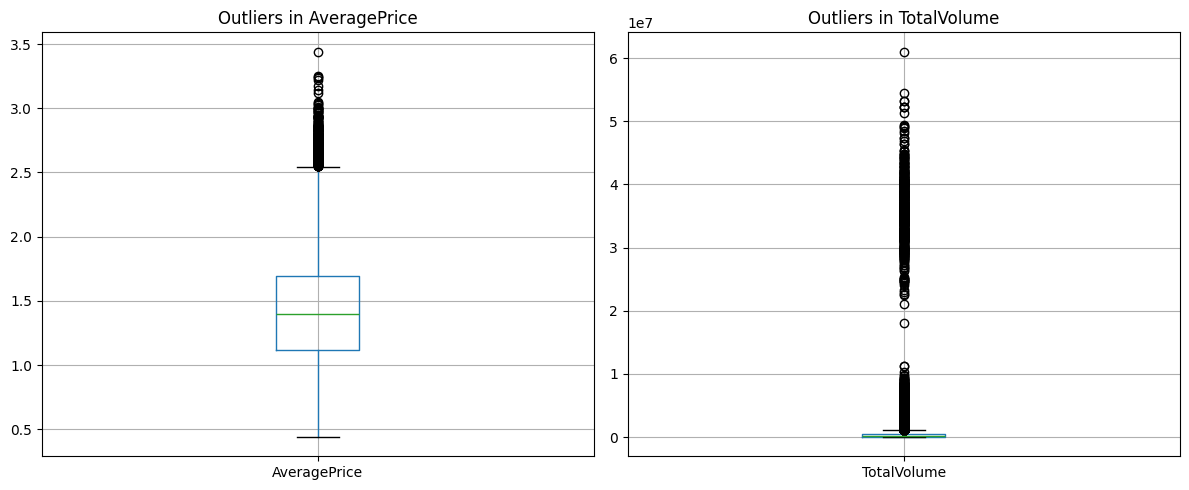

In [22]:
import matplotlib.pyplot as plt

# Step 1: Summary stats for key numeric columns
print(df_clean[["AveragePrice", "TotalVolume", "TotalBags"]].describe())

# Step 2: Boxplots to visualize outliers
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
df_clean.boxplot(column="AveragePrice")
plt.title("Outliers in AveragePrice")

plt.subplot(1, 2, 2)
df_clean.boxplot(column="TotalVolume")
plt.title("Outliers in TotalVolume")

plt.tight_layout()
plt.show()

## Log Transformation of TotalVolume

The TotalVolume column has some very large values that make the data skewed.  
To reduce this effect, we will create a new column using a log transformation.  
This helps to bring the values onto a smaller scale without removing any rows.

In [24]:
import numpy as np

# Create a log transformed version of TotalVolume
df_clean["TotalVolume_log"] = np.log1p(df_clean["TotalVolume"])

# Check the new column
print(df_clean[["TotalVolume", "TotalVolume_log"]].head())


   TotalVolume  TotalVolume_log
0     40873.28        10.618256
1      1373.95         7.226173
2    435021.49        12.983153
3      3846.69         8.255228
4    788025.06        13.577286


## Histogram of TotalVolume before and after log transformation

We will plot the original TotalVolume and the log transformed version.  
This will help us see how the transformation reduces skewness.


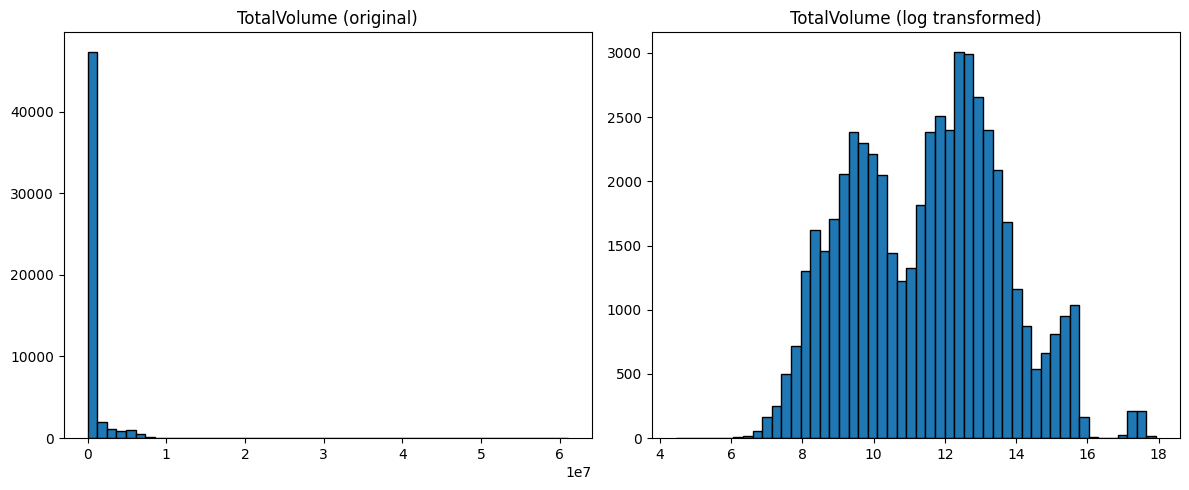

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Original TotalVolume
plt.subplot(1, 2, 1)
plt.hist(df_clean["TotalVolume"], bins=50, edgecolor="black")
plt.title("TotalVolume (original)")

# Log-transformed TotalVolume
plt.subplot(1, 2, 2)
plt.hist(df_clean["TotalVolume_log"], bins=50, edgecolor="black")
plt.title("TotalVolume (log transformed)")

plt.tight_layout()
plt.show()


In [49]:
# Change Date into datetime so we can work with it
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors="coerce")

# Make new time columns (useful for time-based analysis later)
df_clean["Year"] = df_clean["Date"].dt.year
df_clean["Month"] = df_clean["Date"].dt.month
df_clean["Week"] = df_clean["Date"].dt.isocalendar().week.astype(int)

# Look at last 10 rows to confirm
print(df_clean[["Date", "Year", "Month", "Week"]].tail(5))



            Date  Year  Month  Week
53410 2023-12-03  2023     12    48
53411 2023-12-03  2023     12    48
53412 2023-12-03  2023     12    48
53413 2023-12-03  2023     12    48
53414 2023-12-03  2023     12    48


In [52]:
# Change type into numbers so model can read it (0 = conventional, 1 = organic)
df_clean["type_encoded"] = df_clean["type"].map({"conventional": 0, "organic": 1})

# Look at first 10 rows to confirm
print(df_clean[["type", "type_encoded"]].head(5))

# Look at last 10 rows to confirm
print(df_clean[["type", "type_encoded"]].tail(5))


           type  type_encoded
0  conventional             0
1       organic             1
2  conventional             0
3       organic             1
4  conventional             0
          type  type_encoded
53410  organic             1
53411  organic             1
53412  organic             1
53413  organic             1
53414  organic             1


In [ ]:
print([col for col in df_clean.columns if col.startswith("region_")][:10])
print("Number of region columns:", len([col for col in df_clean.columns if col.startswith("region_")]))

#Proof that i had one hot encoded the region. the code was deleted so i cannot run again as region has been dropped. 


['region_Atlanta', 'region_BaltimoreWashington', 'region_BirminghamMontgomery', 'region_Boise', 'region_Boston', 'region_BuffaloRochester', 'region_California', 'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton']
Number of region columns: 59


In [56]:
# 1) Save a clean copy
df_clean.to_csv("avocado_clean.csv", index=False)


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
